In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df1_train =pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
df2_test =pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

In [68]:
df1_train.shape

(175341, 45)

In [69]:
df2_test.shape

(82332, 45)

In [42]:
df = pd.concat([df1_train, df2_test])
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [43]:
df.shape

(257673, 45)

In [44]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [45]:
print(df['attack_cat'].value_counts())
print(df['label'].value_counts())

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64
label
1    164673
0     93000
Name: count, dtype: int64


In [46]:
df.shape

(257673, 45)

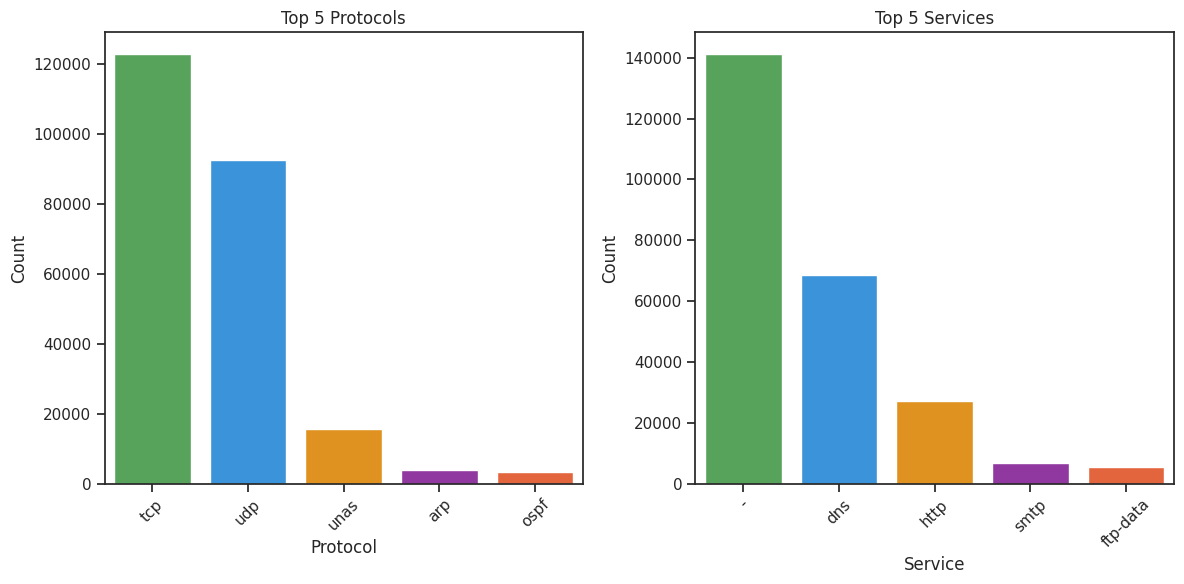

In [47]:
top5_proto = df['proto'].value_counts().head(5)

top5_service = df['service'].value_counts().head(5)

colors = ["#4CAF50", "#2196F3", "#FF9800", "#9C27B0", "#FF5722"]  # 5 colors

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    x=top5_proto.index,
    y=top5_proto.values,
    palette=colors
)
plt.title("Top 5 Protocols")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(
    x=top5_service.index,
    y=top5_service.values,
    palette=colors
)
plt.title("Top 5 Services")
plt.xlabel("Service")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt  

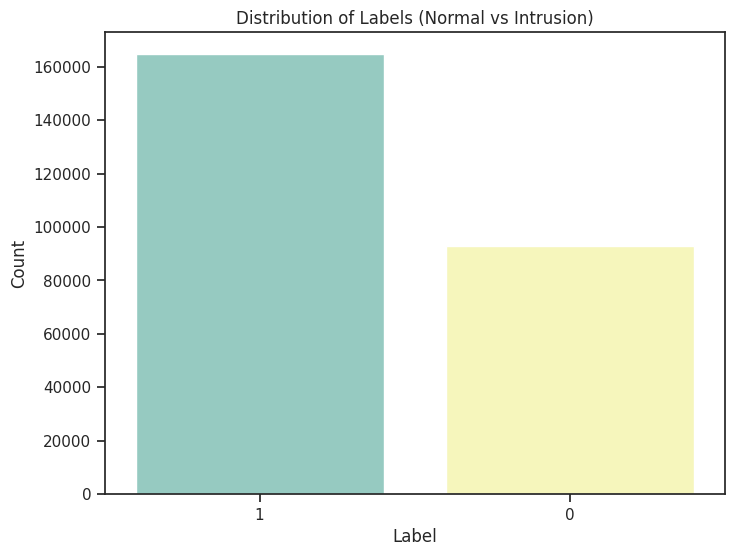

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='Set3', order=df['label'].value_counts().index)
plt.title('Distribution of Labels (Normal vs Intrusion)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

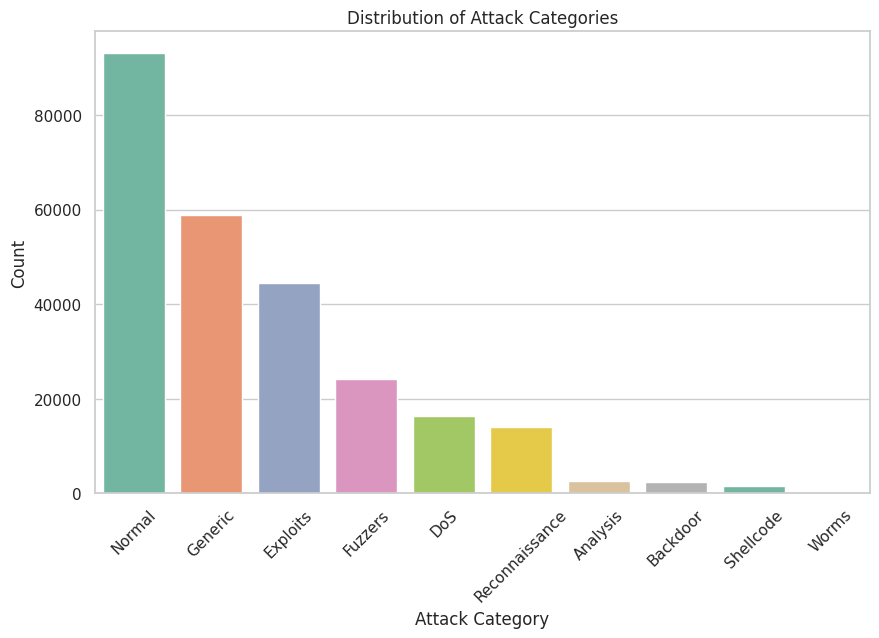

In [50]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='attack_cat', data=df, palette='Set2', order=df['attack_cat'].value_counts().index)
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [51]:
df.drop(columns=["id"], inplace=True)

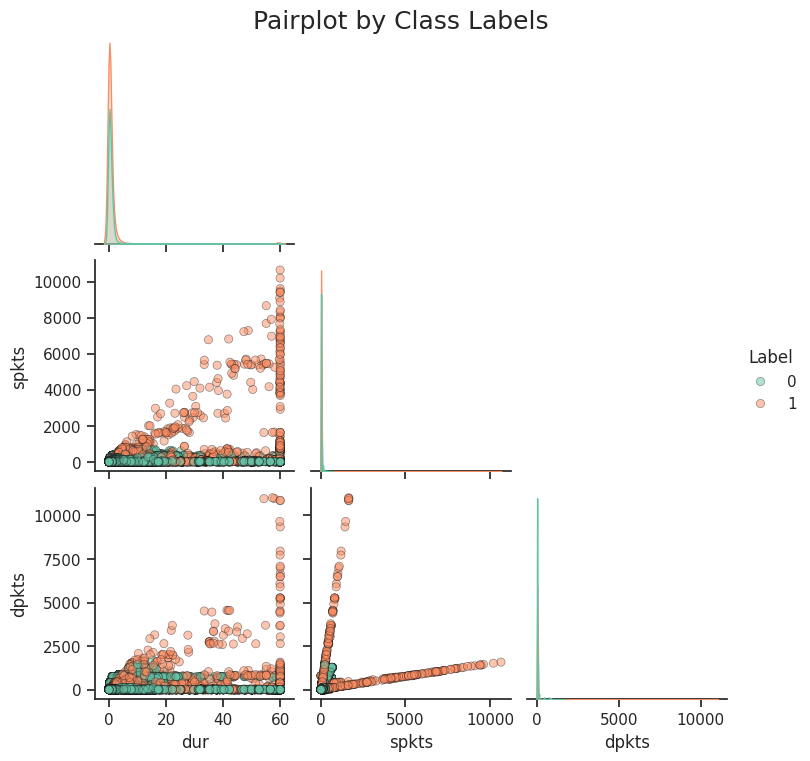

In [52]:
sns.set_theme(style="ticks")

sns.pairplot(
    df.iloc[:, 0:6].assign(Label=df['label']),
    hue='Label',
    palette='Set2',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.5, 's': 35, 'edgecolor': 'k'}
)

plt.suptitle("Pairplot by Class Labels", fontsize=18, y=1.01)
plt.show()

In [53]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())


Missing Values:
 dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat      

In [54]:
print("\nUnique values in each column:")
print(df.nunique())


Unique values in each column:
dur                  109945
proto                   133
service                  13
state                    11
spkts                   646
dpkts                   627
sbytes                 9382
dbytes                 8653
rate                 115763
sttl                     13
dttl                      9
sload                121356
dload                116380
sloss                   490
dloss                   476
sinpkt               114318
dinpkt               110270
sjit                 117101
djit                 114861
swin                     22
stcpb                114473
dtcpb                114187
dwin                     19
tcprtt                63878
synack                57366
ackdat                53248
smean                  1377
dmean                  1362
trans_depth              14
response_body_len      2819
ct_srv_src               57
ct_state_ttl              7
ct_dst_ltm               52
ct_src_dport_ltm         52
ct_dst_sport_ltm 

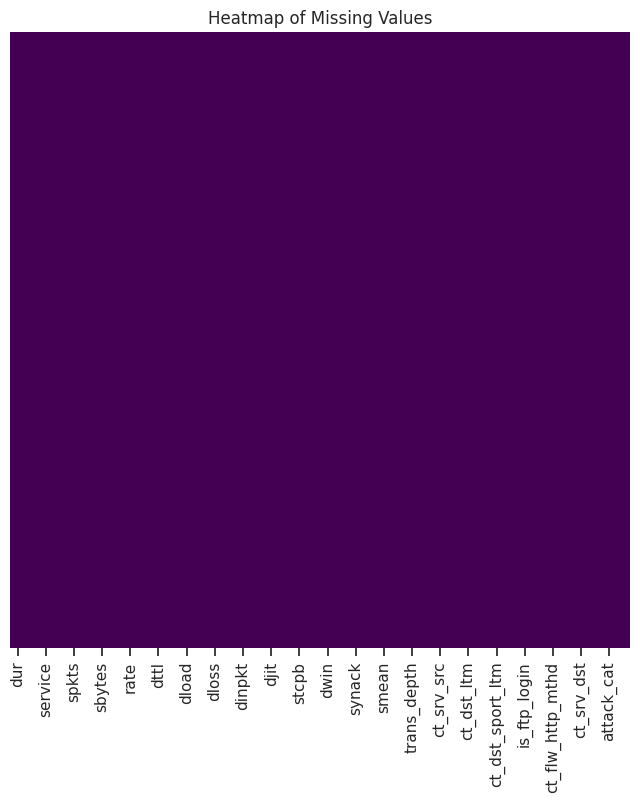

In [55]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [56]:
duplicates = int(df.duplicated().sum())
print(duplicates)

94928


In [57]:
df = df.drop_duplicates()
df = df.drop(columns=['attack_cat'])

In [58]:
label_encoder = LabelEncoder()
categorical_features = [ 'proto','service', 'state']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

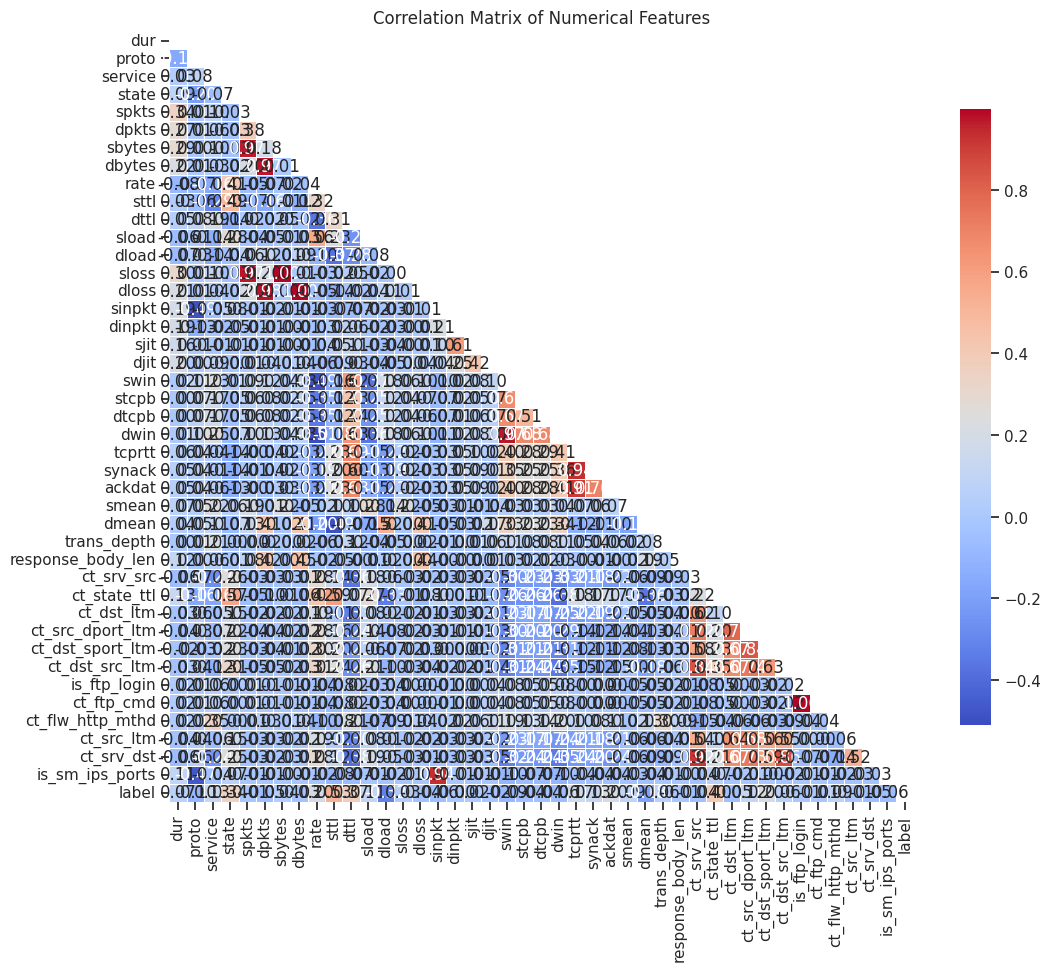

In [59]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [60]:
X=df.drop(['label'],axis=1)
X.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,1,1,0,0,0,1,1,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,1,1,2,0,0,0,1,6,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,2,1,1,3,0,0,0,2,6,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,2,1,1,3,1,1,0,2,1,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,2,2,1,40,0,0,0,2,39,0


In [61]:
Y=df['label']
Y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [62]:
rus = RandomUnderSampler(random_state=42)

X_resampled, Y_resampled = rus.fit_resample(X, Y)

print("Before UnderSampling:", Y.value_counts())
print("\nAfter UnderSampling:", Y_resampled.value_counts())

Before UnderSampling: label
0    85722
1    77023
Name: count, dtype: int64

After UnderSampling: label
0    77023
1    77023
Name: count, dtype: int64


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42, stratify=Y_resampled
)

In [64]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 Random Forest
Random Forest Accuracy: 0.9188

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     15405
           1       0.92      0.92      0.92     15405

    accuracy                           0.92     30810
   macro avg       0.92      0.92      0.92     30810
weighted avg       0.92      0.92      0.92     30810



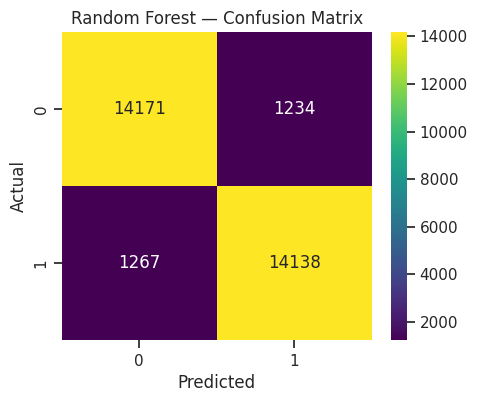


 AdaBoost
AdaBoost Accuracy: 0.8723

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     15405
           1       0.86      0.89      0.88     15405

    accuracy                           0.87     30810
   macro avg       0.87      0.87      0.87     30810
weighted avg       0.87      0.87      0.87     30810



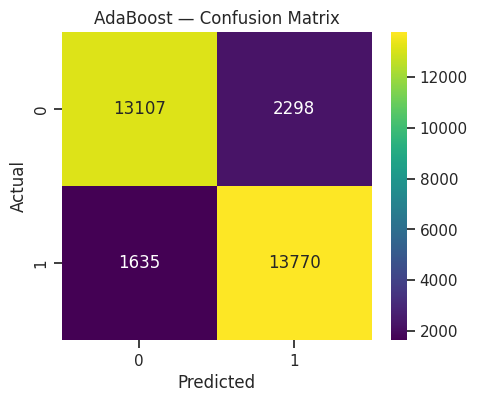


 Logistic Regression
Logistic Regression Accuracy: 0.8604

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     15405
           1       0.81      0.95      0.87     15405

    accuracy                           0.86     30810
   macro avg       0.87      0.86      0.86     30810
weighted avg       0.87      0.86      0.86     30810



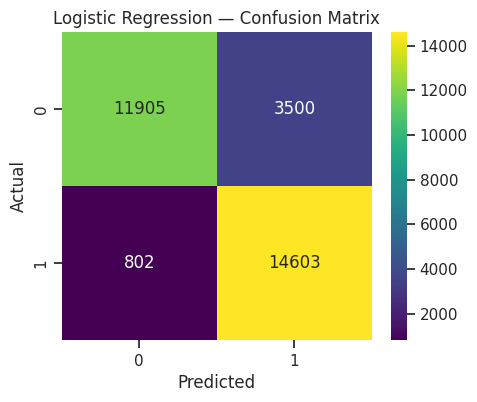

In [67]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

accuracy_scores = {}

for model_name, model in models.items():
    print("\n==============================")
    print(f" {model_name}")
    print("==============================")

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, y_pred)
    accuracy_scores[model_name] = acc

    print(f"{model_name} Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))

    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="viridis")
    plt.title(f"{model_name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

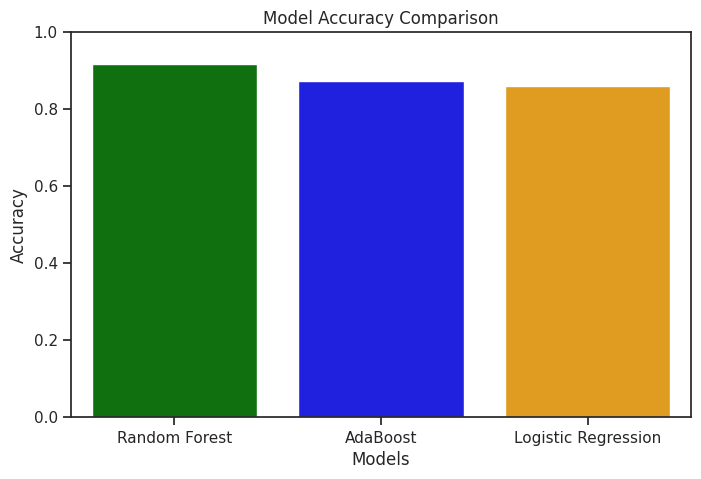

In [66]:
plt.figure(figsize=(8,5))

sns.barplot(
    x=list(accuracy_scores.keys()),
    y=list(accuracy_scores.values()),
    palette=["green", "blue", "orange"]
)

plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

plt.show()